In [1]:
# Import modules
import pathlib
import sqlite3

In [2]:
# Accessing the NEO database
database_dir = pathlib.Path("../databases/neos/")
database_file = pathlib.Path("neodys.db")
database_filepath = database_dir / database_file

# Establish a connection to the database and set a cursor
neodys_db_con = sqlite3.connect(database_filepath)
neodys_db_cur = neodys_db_con.cursor()

In [3]:
import pandas as pd

# Get all information from the DB. Since the DB is rather small, this won't cause any issues!
neo_df = pd.read_sql("SELECT * FROM main", neodys_db_con)

# Close the database.
neodys_db_con.close()

In [4]:
neo_df

,Name,Epoch_MJD,SemMajAxis_AU,Ecc_,Incl_deg,LongAscNode_deg,ArgP_deg,MeanAnom_deg,AbsMag_,SlopeParamG_,Aphel_AU,Perihel_AU,NEOClass
0,433,59600.0,1.458273,0.222727,10.828461,304.296346,178.897177,246.904119,10.87,0.46,1.783070,1.133476,Amor
1,719,59600.0,2.637505,0.546959,11.575272,183.855259,156.227573,278.197185,15.53,0.15,4.080112,1.194899,Amor
2,887,59600.0,2.473158,0.570486,9.394141,110.428769,350.493276,86.607207,13.33,-0.12,3.884060,1.062256,Amor
3,1036,59600.0,2.665849,0.533122,26.677908,215.517191,132.428118,140.654843,9.41,0.30,4.087071,1.244627,Amor
4,1221,59600.0,1.918731,0.435843,11.883264,171.320251,26.643922,261.044505,17.40,0.15,2.754996,1.082467,Amor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29044,2022KY2,59600.0,1.439076,0.290852,9.562666,220.831102,344.748373,308.992894,24.82,0.15,1.857634,1.020519,Amor
29045,2022KZ,59600.0,1.404505,0.389038,10.755270,64.554335,243.245936,257.305079,26.44,0.15,1.950911,0.858099,Apollo
29046,2022KZ1,59600.0,1.643745,0.562916,31.322592,63.673736,262.310279,276.670518,26.14,0.15,2.569035,0.718455,Apollo
29047,2022KZ2,59600.0,1.342108,0.412424,13.556790,237.807367,283.141272,319.777066,26.25,0.15,1.895626,0.788590,Apollo


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

(0.0, 35.0)

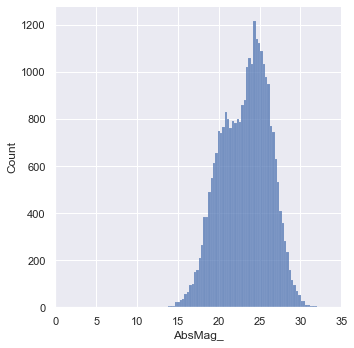

In [6]:
# Creating quickly an overview plot with seaborn
# Use bins=... to set the number of bins or
# bin_width=... to set the width of each bins. Quite easy!
sns_plt = sns.displot(neo_df, x="AbsMag_")
plt.xlim(0, 35)

(15.0, 30.0)

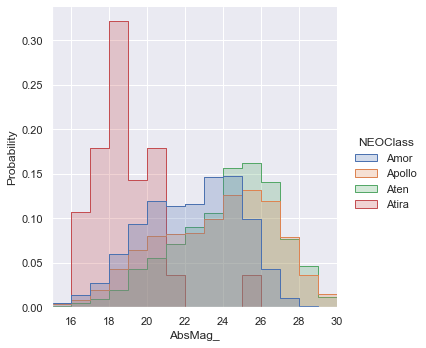

In [7]:
sns_plt = sns.displot(neo_df.loc[neo_df["NEOClass"] != "Other"],
                      x="AbsMag_",
                      hue="NEOClass",
                      element="step",
                      stat="probability",
                      common_norm=False,
                      binwidth=1)
plt.xlim(15, 30)

(0.5, 3.0)

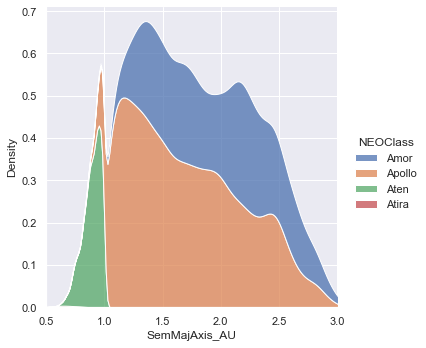

In [8]:
sns.displot(neo_df.loc[(neo_df["NEOClass"] != "Other") & (neo_df["SemMajAxis_AU"] < 3.0)],
            x="SemMajAxis_AU",
            hue="NEOClass",
            kind="kde",
            multiple="stack")
plt.xlim(0.5,3)

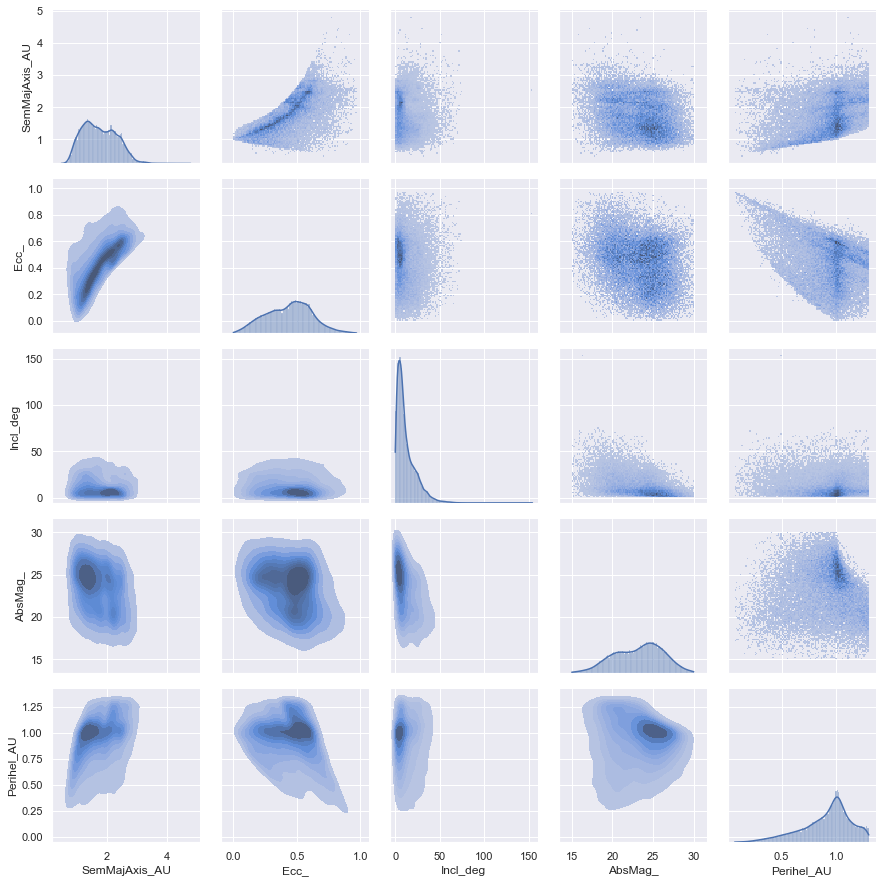

In [9]:
neo_df_filtered = neo_df.loc[(neo_df["NEOClass"] != "Other")
                             & (neo_df["SemMajAxis_AU"] <= 5)
                             & (neo_df["AbsMag_"] <= 30)
                             & (neo_df["AbsMag_"] >= 15)].copy()
neo_df_filtered = neo_df_filtered[["SemMajAxis_AU",
                                   "Ecc_",
                                   "Incl_deg",
                                   "AbsMag_",
                                   "Perihel_AU",]].copy()

g = sns.PairGrid(neo_df_filtered)
g.map_upper(sns.histplot, bins=100)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True, bins=100)